In [1]:
from tqdm import tqdm
import numpy as np
import os
import csv
import pickle
import matplotlib.pyplot as plt
import cooler
import pandas as pd
import glob

In [2]:
import seaborn as sns
sns.set_style("white")
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib
matplotlib.rcParams['font.family'] = 'Helvetica'

### 1. Get the list of chromosomes

In [ ]:
path_to_maps = "/tank/projects/schizophrenia_2021/hi-c/our_data/2022.11_2"
resolution = 25000

clr_HC_minus = cooler.Cooler(f'{path_to_maps}/HC_merged_sampled/sampled_minus_drop_diag_1K.mcool::/resolutions/{resolution}')
clr_HC_plus = cooler.Cooler(f'{path_to_maps}/HC_merged_sampled/sampled_plus_drop_diag_1K.mcool::/resolutions/{resolution}')
chroms = list(clr_HC_minus.chromsizes.index)

### 2. Get the maps

In [8]:
directory = "/tank/projects/schizophrenia_2021/hi-c/our_data/2022.11_2/2023.03"
files = [file for file in os.listdir(directory) if  "HC" in file]
files.sort()
files

['HC-2Mminus.mcool',
 'HC-2Mplus.mcool',
 'HC-318minus.mcool',
 'HC-318plus.mcool',
 'HC-3Mminus.mcool',
 'HC-3Mplus.mcool',
 'HC-91minus.mcool',
 'HC-91plus.mcool']

In [80]:
directory = "/tank/projects/schizophrenia_2021/hi-c/our_data/2022.11_2/HC_sampled"
files = [file for file in os.listdir(directory) if  "HC" in file and "mcool" in file]
files.sort()
files

['sampled_HC-2Mminus_drop_diag_1K.mcool',
 'sampled_HC-2Mplus_drop_diag_1K.mcool',
 'sampled_HC-318minus_drop_diag_1K.mcool',
 'sampled_HC-318plus_drop_diag_1K.mcool',
 'sampled_HC-3Mminus_drop_diag_1K.mcool',
 'sampled_HC-3Mplus_drop_diag_1K.mcool',
 'sampled_HC-91minus_drop_diag_1K.mcool',
 'sampled_HC-91plus_drop_diag_1K.mcool']

### 3. Calculate cis-trans

In [97]:
def calculate_cis_trans_several_files(files, normalized=False, directory = "/tank/projects/schizophrenia_2021/hi-c/our_data/2022.11_2/HC_sampled"):
    types = ["2M", "318", "3M", "91"]
    res_cis_to_trans = {}
    for type in tqdm(types):
        files_pair = [directory+"/"+file for file in files if type in file]
        print(type)
        res_cis_to_trans[type] = {}
        res_cis_to_trans[type] = compute_cis_trans(files_pair, dropdiag=0, resolution=50000, stable=True, normalized=normalized) 
    return res_cis_to_trans

In [98]:
res_cis_to_trans = calculate_cis_trans_several_files(files, normalized=False)
# res_cis_to_trans_norm= calculate_cis_trans_several_files(files, normalized=True)

  0%|                                                                                                                                                                                | 0/4 [00:00<?, ?it/s]

2M



  0%|                                                                                                                                                                                | 0/2 [00:00<?, ?it/s]/tmp/ipykernel_9481/2411973133.py:22: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  bins = clr.bins()[:].drop(['start', 'end'], 1)

 50%|████████████████████████████████████████████████████████████████████████████████████                                                                                    | 1/2 [00:28<00:28, 28.80s/it]/tmp/ipykernel_9481/2411973133.py:22: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  bins = clr.bins()[:].drop(['start', 'end'], 1)

 25%|██████████████████████████████████████████                                                                                                          

318



  0%|                                                                                                                                                                                | 0/2 [00:00<?, ?it/s]/tmp/ipykernel_9481/2411973133.py:22: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  bins = clr.bins()[:].drop(['start', 'end'], 1)

 50%|████████████████████████████████████████████████████████████████████████████████████                                                                                    | 1/2 [00:45<00:45, 45.40s/it]/tmp/ipykernel_9481/2411973133.py:22: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  bins = clr.bins()[:].drop(['start', 'end'], 1)

 50%|████████████████████████████████████████████████████████████████████████████████████                                                                

3M



  0%|                                                                                                                                                                                | 0/2 [00:00<?, ?it/s]/tmp/ipykernel_9481/2411973133.py:22: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  bins = clr.bins()[:].drop(['start', 'end'], 1)

 50%|████████████████████████████████████████████████████████████████████████████████████                                                                                    | 1/2 [00:38<00:38, 38.26s/it]/tmp/ipykernel_9481/2411973133.py:22: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  bins = clr.bins()[:].drop(['start', 'end'], 1)

 75%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                      

91



  0%|                                                                                                                                                                                | 0/2 [00:00<?, ?it/s]/tmp/ipykernel_9481/2411973133.py:22: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  bins = clr.bins()[:].drop(['start', 'end'], 1)

 50%|████████████████████████████████████████████████████████████████████████████████████                                                                                    | 1/2 [00:42<00:42, 42.38s/it]/tmp/ipykernel_9481/2411973133.py:22: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  bins = clr.bins()[:].drop(['start', 'end'], 1)

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████

0it [00:00, ?it/s]

2M 1.8


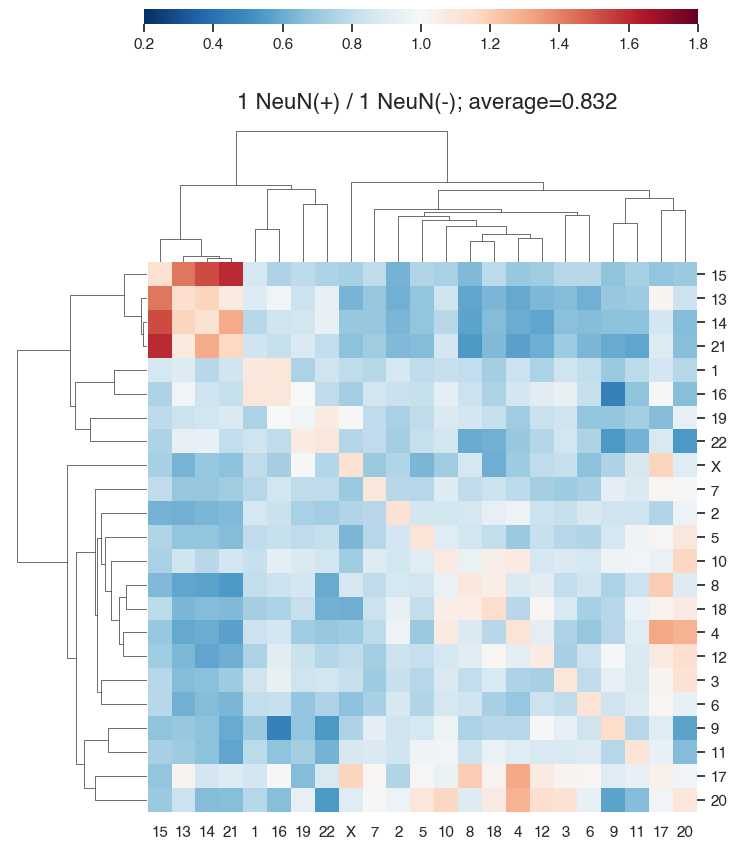

1it [00:01,  1.10s/it]

318 1.9


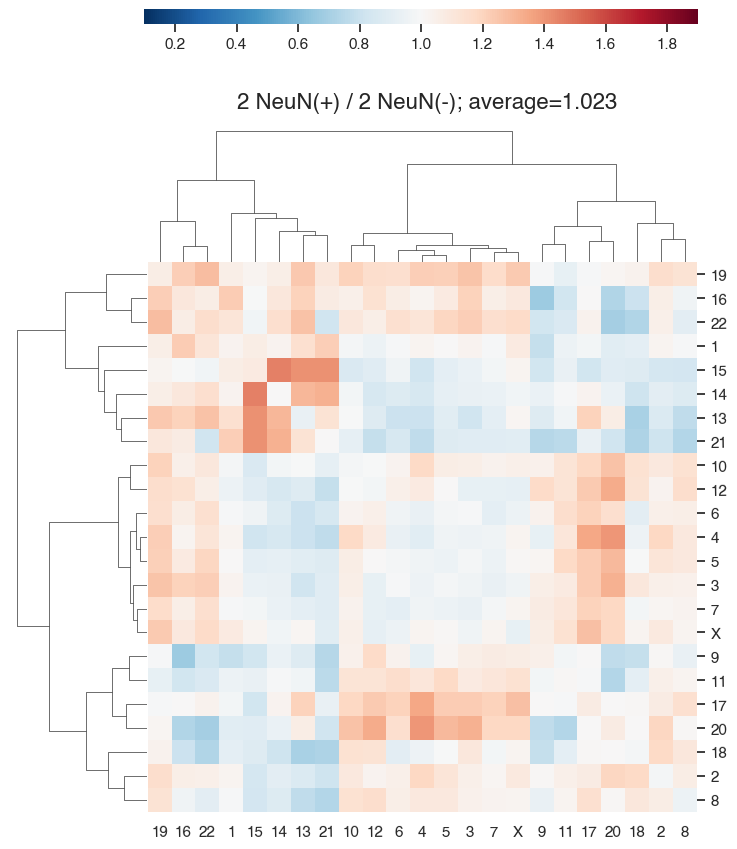

2it [00:02,  1.02s/it]

3M 1.6


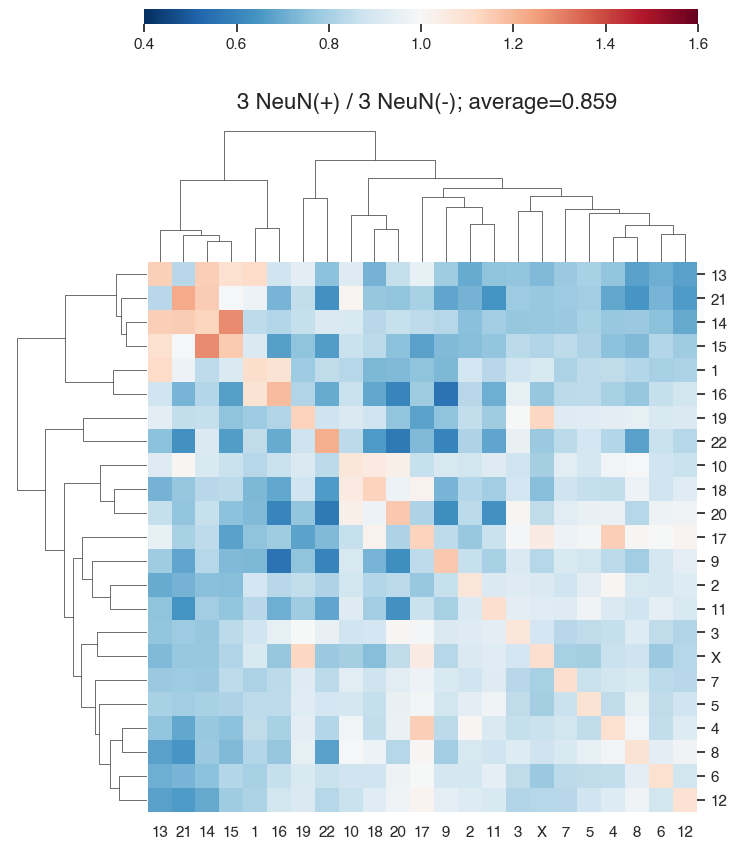

3it [00:03,  1.01it/s]

91 1.7


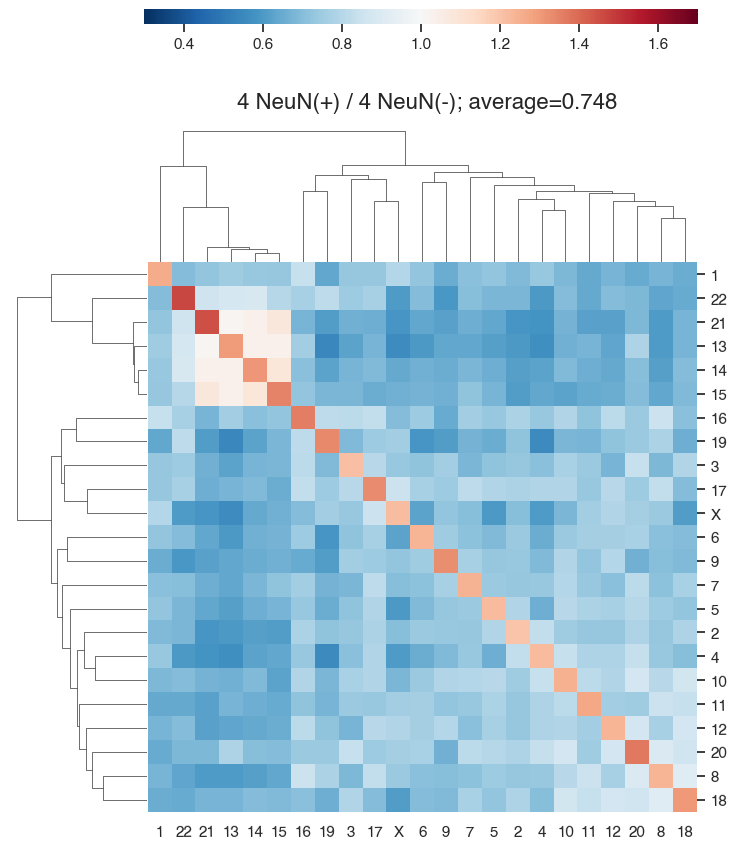

4it [00:03,  1.00it/s]


In [144]:
## norm
cnt=0
for type ,vmax in tqdm(zip(types, [1.8 , 1.9, 1.6, 1.7])):
    data = res_cis_to_trans_norm[type]
    print(type ,vmax)
    cnt+=1
    plot_cis_to_trans( res_cis_to_trans_norm[type][f"sampled_HC-{type}plus_drop_diag_1K"], res_cis_to_trans_norm[type][f"sampled_HC-{type}minus_drop_diag_1K"], cnt, vmax=vmax, savepath = f"/tank/projects/diana_hic/figs_hic_paper/figs_hic_paper_review/cis_to_trans_individual_{type}_normMaps.pdf")

0it [00:00, ?it/s]

2M 1.8


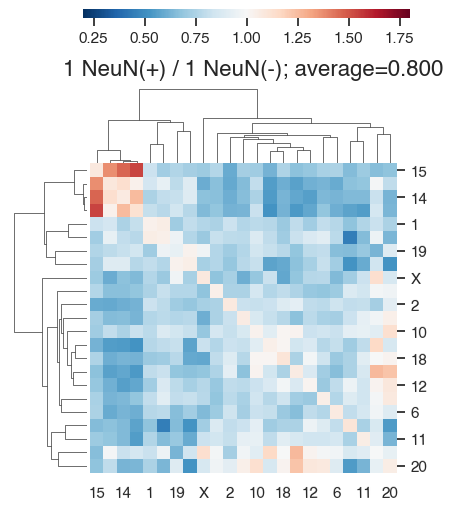

1it [00:00,  2.63it/s]

318 1.9


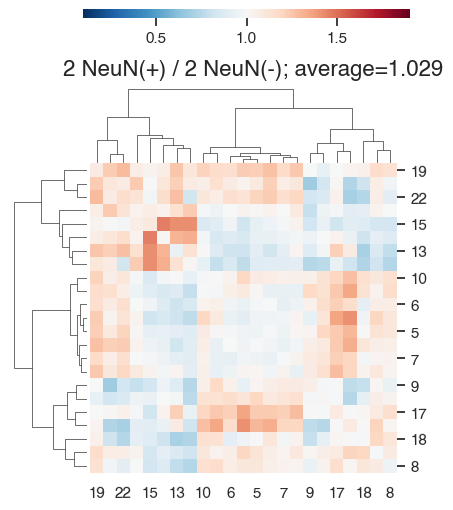

2it [00:00,  2.69it/s]

3M 1.4


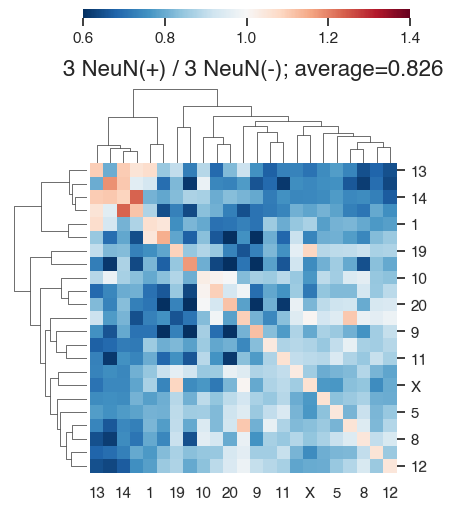

3it [00:01,  2.69it/s]

91 1.7


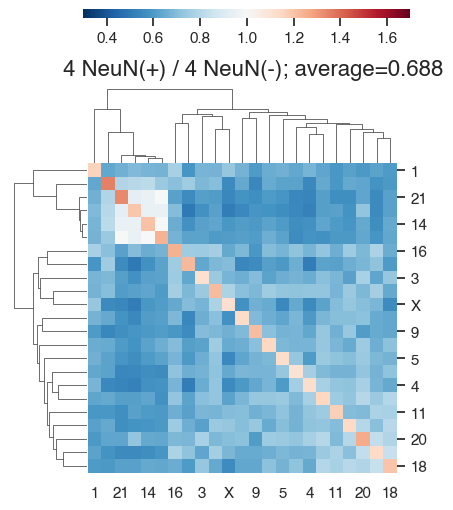

4it [00:01,  2.32it/s]


In [99]:
##not norm 
cnt=0
for type ,vmax in tqdm(zip(types, [1.8 , 1.9, 1.4, 1.7])):
    data = res_cis_to_trans[type]
    print(type ,vmax)
    cnt+=1
    plot_cis_to_trans( res_cis_to_trans[type][f"sampled_HC-{type}plus_drop_diag_1K"], res_cis_to_trans[type][f"sampled_HC-{type}minus_drop_diag_1K"], cnt, vmax=vmax, savepath =None)

0it [00:00, ?it/s]

2M 1.5


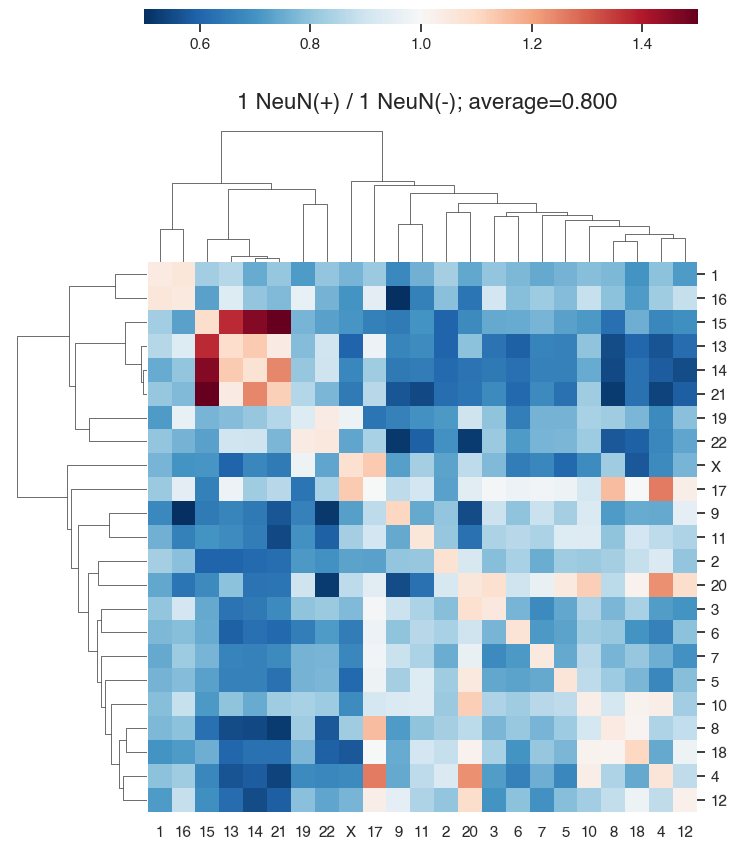

1it [00:01,  1.41s/it]

318 1.5


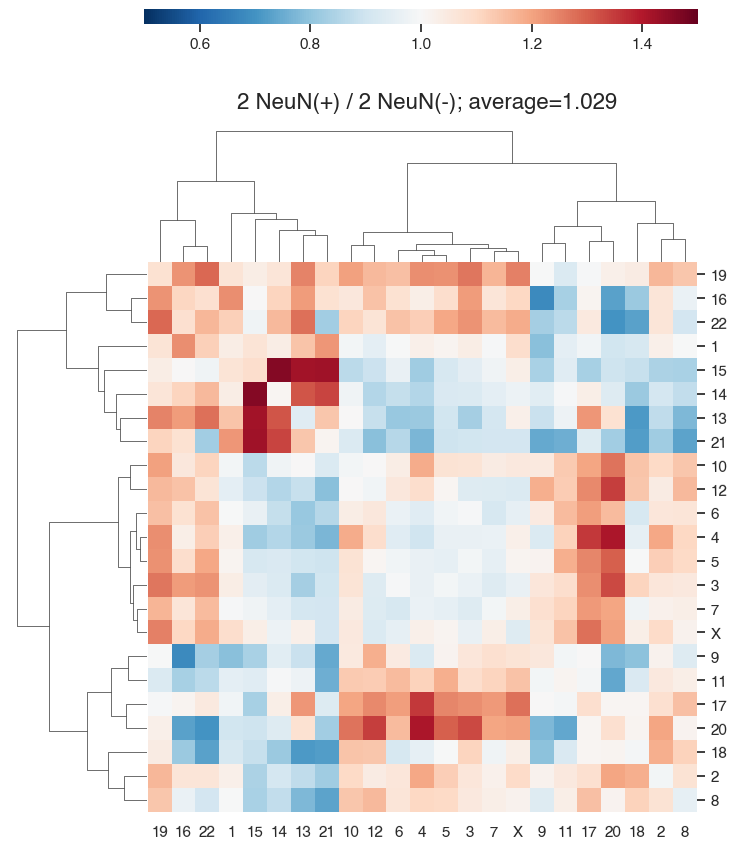

2it [00:02,  1.32s/it]

3M 1.5


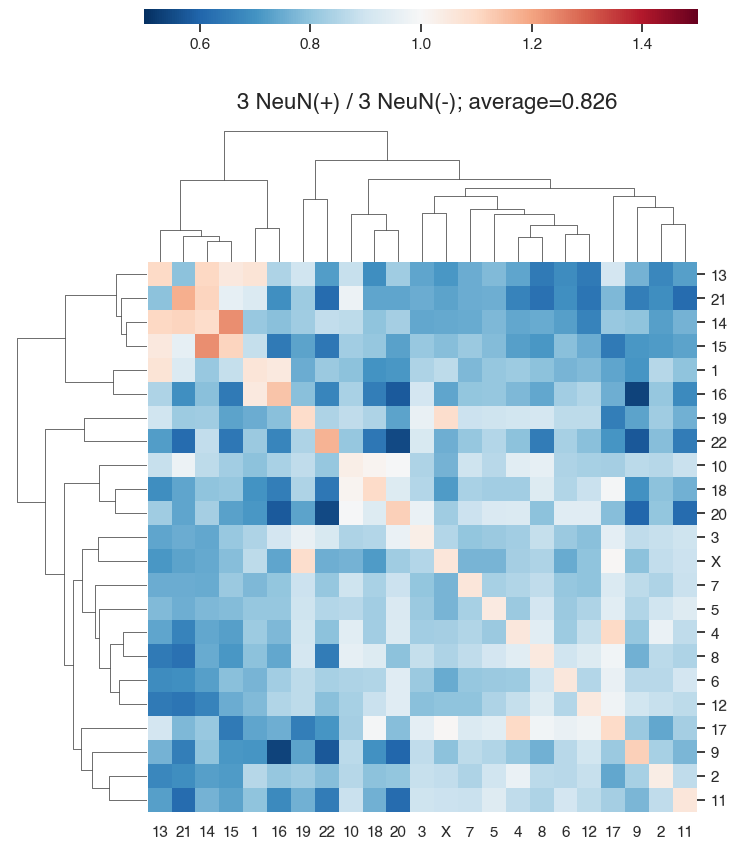

3it [00:03,  1.26s/it]

91 1.5


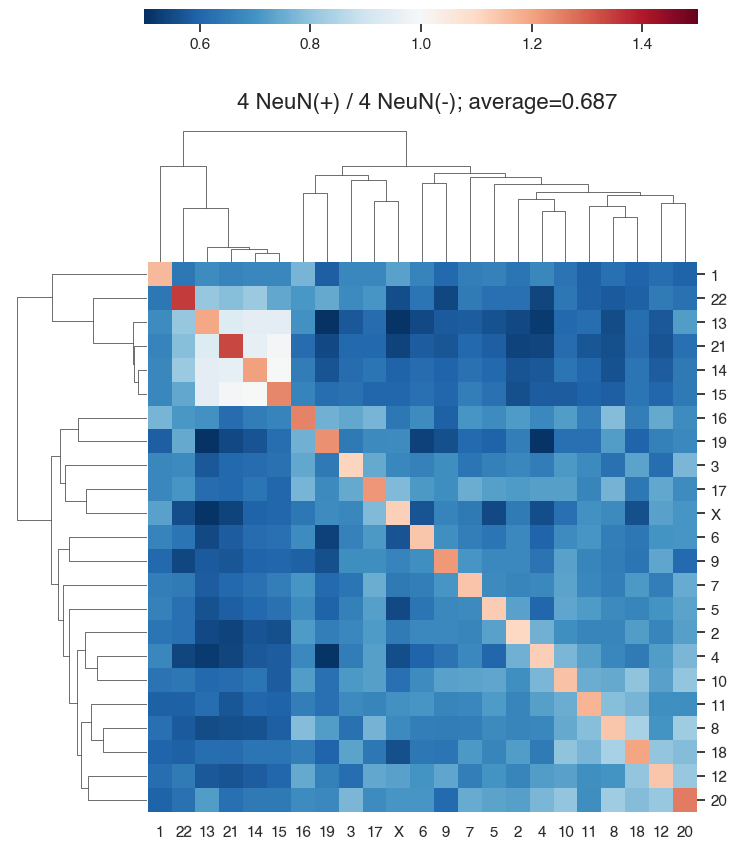

4it [00:04,  1.23s/it]


In [60]:
cnt=0
for type ,vmax in tqdm(zip(types, [1.5 , 1.5, 1.5, 1.5])):
    data = res_cis_to_trans[type]
    print(type ,vmax)
    cnt+=1
    plot_cis_to_trans( res_cis_to_trans[type][f"HC-{type}plus"], res_cis_to_trans[type][f"HC-{type}minus"], cnt, vmax=vmax, savepath = f"/tank/projects/diana_hic/figs_hic_paper/figs_hic_paper_review/cis_to_trans_individual_{type}.pdf")

In [23]:
def compute_cis_trans(hiclist, dropdiag=0, resolution=50000, stable=True, normalized=False):
    """
    This function returns a dictionary where keys are names of Hi-C matrices
    and values are matrices of cis-trans contact sums.
    
    hiclist :: [str] - list of paths to .mcool files
    dropdiag :: int - number of diags to drop (main diagonal counts from 1)
    resolution :: int - desired resolution for Hi-C matrix
    stable :: bool - whether to add 1 to contact sums matrix (for numerical 
                     stability at logarithm computation)
    normalized :: bool - whether to normalize matrix with a total sum of contacts
    """
    interchrom = {}
    for path in tqdm(hiclist):
        clr = cooler.Cooler(path + '::/resolutions/%d' % resolution)
       # clr = cooler.Cooler(path)
        sizes = np.array(clr.chromsizes.values) / resolution #compute normalization matrix
        norm = np.outer(sizes, sizes)

        pix = clr.pixels()[:]
        pix_no_diag = pix[pix.bin2_id >= pix.bin1_id + dropdiag] #delete m first diagonals
        bins = clr.bins()[:].drop(['start', 'end'], 1)

        cis_trans = np.asarray(
                    pix_no_diag.merge(bins, left_on='bin1_id', right_index=True).\
                                merge(bins, left_on='bin2_id', right_index=True).\
                                groupby(['chrom_x', 'chrom_y']).sum().\
                                unstack(fill_value=0)['count']) #convert to square matrix

        cis_trans = cis_trans + cis_trans.T - np.diag(np.diag(cis_trans))
        if normalized:
            fullsum = np.nansum(cis_trans)
            if fullsum == 0.:
                print('Drop %s due to zero contact sum' % path)
                continue
            cis_trans = cis_trans / fullsum * 2 * 1_000_000 #scale by constant
        if stable:
            cis_trans += 1
        result = cis_trans / norm
        interchrom[os.path.splitext(os.path.basename(clr.filename))[0]] = result 
    return interchrom

In [143]:
def plot_cis_to_trans(map1, map2,  type, vmax=1.45, savepath=None):

    m = map1[:-2, :-2] / map2[:-2, :-2]
    df_corr = pd.DataFrame(m)
    df_corr.index = chroms[:23]
    df_corr.columns = chroms[:23]
    df_corr.columns = [i.split("chr")[1] for i in df_corr.columns.tolist()]
    df_corr.index =  df_corr.columns.tolist()    
    # df_corr = df_corr.reindex(sorter, axis='index').reindex(sorter, axis='columns')
    sns.set(font='Helvetica')
    matplotlib.rcParams['font.family'] = 'Helvetica'
    g = sns.clustermap(df_corr,  
                       figsize = (7.5,7.5), 
                       # figsize = (4.5,4.5),
                       cbar_kws={"orientation": "horizontal"},
                       metric="correlation", cmap="RdBu_r",vmax = vmax, vmin = 1-(vmax-1))
    x0, _y0, _w, _h = g.cbar_pos
    g.ax_cbar.set_position([x0+0.183, 1.11, g.ax_row_dendrogram.get_position().width+0.555, 0.02])    
    g.fig.suptitle(f"{type} NeuN(+) " + '/ ' + f"{type} NeuN(-)" + '; average=%.3f' % np.nanmean(m), fontsize=16,  y=1.02, x =0.58)    
    plt.setp(g.ax_heatmap.yaxis.get_majorticklabels(), rotation=1)
    plt.setp(g.ax_heatmap.xaxis.get_majorticklabels(), rotation=1)    
    sns.set_style("ticks")    
    g.ax_row_dendrogram.set_visible(True)
    g.ax_col_dendrogram.set_visible(True)
    g.cax.yaxis.set_ticks_position("default")   
    if savepath:
        plt.savefig(savepath, dpi=400, bbox_inches='tight', format='pdf')
    plt.show()

In [75]:
def plot_cis_to_trans(map1, map2,  type, vmax=1.45, savepath=None):

    m = map1[:-2, :-2] / map2[:-2, :-2]
    df_corr = pd.DataFrame(m)
    df_corr.index = chroms[:23]
    df_corr.columns = chroms[:23]
    df_corr.columns = [i.split("chr")[1] for i in df_corr.columns.tolist()]
    df_corr.index =  df_corr.columns.tolist()    
    # df_corr = df_corr.reindex(sorter, axis='index').reindex(sorter, axis='columns')
    sns.set(font='Helvetica')
    matplotlib.rcParams['font.family'] = 'Helvetica'
    g = sns.clustermap(df_corr,  
                       # figsize = (7.5,7.5), 
                       figsize = (4.5,4.5),
                       cbar_kws={"orientation": "horizontal"},
                       metric="correlation", cmap="RdBu_r",vmax = vmax, vmin = 1-(vmax-1))
    x0, _y0, _w, _h = g.cbar_pos
    g.ax_cbar.set_position([x0+0.183, 1.11, g.ax_row_dendrogram.get_position().width+0.555, 0.02])    
    g.fig.suptitle(f"{type} NeuN(+) " + '/ ' + f"{type} NeuN(-)" + '; average=%.3f' % np.nanmean(m), fontsize=16,  y=1.02, x =0.58)    
    plt.setp(g.ax_heatmap.yaxis.get_majorticklabels(), rotation=1)
    plt.setp(g.ax_heatmap.xaxis.get_majorticklabels(), rotation=1)    
    sns.set_style("ticks")    
    g.ax_row_dendrogram.set_visible(True)
    g.ax_col_dendrogram.set_visible(True)
    g.cax.yaxis.set_ticks_position("default")   
    if savepath:
        plt.savefig(savepath, dpi=400, bbox_inches='tight', format='pdf')
    plt.show()

### Create box plots

In [136]:
from statannot import add_stat_annotation

In [190]:
from statannot import add_stat_annotation
def cis_tran_box_plots_cal(file , type):
    interactions25000_new_cis_plus = file[type][f"sampled_HC-{type}plus_drop_diag_1K"][:-2, :-2].diagonal()
    interactions25000_new_cis_minus = file[type][f"sampled_HC-{type}minus_drop_diag_1K"][:-2, :-2].diagonal()
    
    A = file[type][f"sampled_HC-{type}minus_drop_diag_1K"][:-2, :-2]
    interactions25000_new_trans_minus = A[~np.eye(A.shape[0],dtype=bool)].reshape(A.shape[0],-1).flatten()
    
    A = file[type][f"sampled_HC-{type}plus_drop_diag_1K"][:-2, :-2]
    interactions25000_new_trans_plus = A[~np.eye(A.shape[0],dtype=bool)].reshape(A.shape[0],-1).flatten()
    
    new_trans = pd.DataFrame(zip(interactions25000_new_trans_plus.tolist() + interactions25000_new_trans_minus.tolist(), ["NeuN+"]*len(interactions25000_new_trans_plus) + ["NeuN-"]*len(interactions25000_new_trans_minus)), columns = ["contacts","cell type"])
    new_cis = pd.DataFrame(zip(interactions25000_new_cis_plus.tolist() + interactions25000_new_cis_minus.tolist(), ["NeuN+"]*len(interactions25000_new_cis_plus) + ["NeuN-"]*len(interactions25000_new_cis_minus)), columns = ["contacts","cell type"])
    new_trans["type_contacts"] = "trans"
    new_cis["type_contacts"] = "cis"
    df = pd.concat([new_trans, new_cis]).reset_index(drop=True)
    df["sample"] = type
    return df

def cis_tran_box_plots_plot(res_box_plot_trans,  add_significance = False, savepath = None):
    plt.figure(figsize=(6.7,4.5))
    my_pal = {"NeuN+": (sns.color_palette()[4]), "NeuN-": (sns.color_palette()[1])}
    sns.set(font_scale=1)
    sns.set_style("whitegrid")
    box_plot= sns.boxplot(data=res_box_plot_trans, x="sample", y="contacts",
                          hue = "cell type",
                          palette=my_pal,   
                           width=0.5
                         )
    box_plot.set_xlabel('')
    box_plot.set_ylabel("Interactions")   
    box_plot.set_ylabel("Interactions")
    plt.ylim(0.00005, 0.0014)            
    
    if add_significance:
        add_stat_annotation(box_plot, data=res_box_plot_trans, x="sample", y="contacts",
                        hue = "cell type",           
                       box_pairs=[(("2M", "NeuN+"), ("2M", "NeuN-")),
                                 (("318", "NeuN+"), ("318", "NeuN-")),
                                 (("3M", "NeuN+"), ("3M", "NeuN-")),
                                 (("91", "NeuN+"), ("91", "NeuN-")),],
                        test='Mann-Whitney', text_format='star', loc='inside', verbose=0);             
    
    
    if savepath:
        plt.savefig(savepath, dpi=400, bbox_inches='tight', format='pdf')

In [134]:
# res_box_plot = pd.DataFrame()
# for type in types:
#     res = cis_tran_box_plots_cal(res_cis_to_trans_norm , type)
#     res_box_plot = pd.concat([res_box_plot, res]).reset_index(drop=True)
# res_box_plot_trans = res_box_plot[res_box_plot.type_contacts == "trans"].reset_index(drop=True)
# res_box_plot_cis = res_box_plot[res_box_plot.type_contacts == "cis"].reset_index(drop=True)

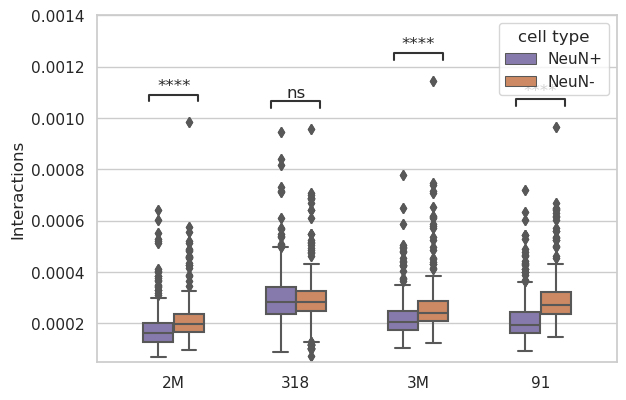

In [191]:
cis_tran_box_plots_plot(res_box_plot_trans,  add_significance = True, savepath = f"/tank/projects/diana_hic/figs_hic_paper/figs_hic_paper_review/trans_contacts_individual_maps.pdf")

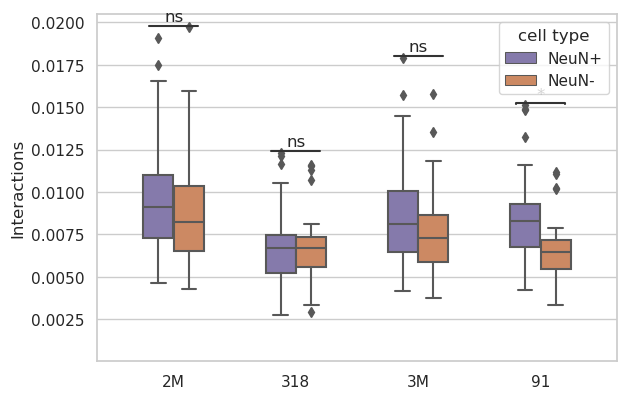

In [192]:
cis_tran_box_plots_plot(res_box_plot_cis,  add_significance = True, savepath =  f"/tank/projects/diana_hic/figs_hic_paper/figs_hic_paper_review/cis_contacts_individual_maps.pdf")

### Res cis to trans Hu

In [159]:
directory = "/tank/projects/schizophrenia_2021/hi-c/hu2021/sampled/"
files = [file for file in os.listdir(directory) if "mcool" in file]
files.sort()
files

['HSB106neg.hg38.sampled.mcool',
 'HSB106pos.hg38.sampled.mcool',
 'HSB181pos.hg38.sampled.mcool',
 'HSB189neg.hg38.sampled.mcool',
 'HSB189pos.hg38.sampled.mcool',
 'HSB277neg.hg38.sampled.mcool',
 'HSB277pos.hg38.sampled.mcool']

In [162]:
def calculate_cis_trans_hu(files, normalized=False, directory = "/tank/projects/schizophrenia_2021/hi-c/hu2021/sampled/"):
    types = ["106", "189", "277"]
    res_cis_to_trans = {}
    for type in tqdm(types):
        files_pair = [directory+"/"+file for file in files if type in file]
        print(type)
        res_cis_to_trans[type] = {}
        res_cis_to_trans[type] = compute_cis_trans(files_pair, dropdiag=0, resolution=50000, stable=True, normalized=normalized) 
    return res_cis_to_trans

In [163]:
# res_cis_to_trans_hu = calculate_cis_trans_hu(files, normalized=False)
res_cis_to_trans_norm_hu= calculate_cis_trans_hu(files, normalized=True)

  0%|                                                                               | 0/3 [00:00<?, ?it/s]

106



  0%|                                                                               | 0/2 [00:00<?, ?it/s]/tmp/ipykernel_9481/2411973133.py:22: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  bins = clr.bins()[:].drop(['start', 'end'], 1)

 50%|███████████████████████████████████▌                                   | 1/2 [00:52<00:52, 52.89s/it]/tmp/ipykernel_9481/2411973133.py:22: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  bins = clr.bins()[:].drop(['start', 'end'], 1)

 33%|███████████████████████▋                                               | 1/3 [01:12<02:25, 72.70s/it]

189



  0%|                                                                               | 0/2 [00:00<?, ?it/s]/tmp/ipykernel_9481/2411973133.py:22: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  bins = clr.bins()[:].drop(['start', 'end'], 1)

 50%|███████████████████████████████████▌                                   | 1/2 [01:26<01:26, 86.64s/it]/tmp/ipykernel_9481/2411973133.py:22: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  bins = clr.bins()[:].drop(['start', 'end'], 1)

 67%|███████████████████████████████████████████████▎                       | 2/3 [03:03<01:34, 94.93s/it]

277



  0%|                                                                               | 0/2 [00:00<?, ?it/s]/tmp/ipykernel_9481/2411973133.py:22: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  bins = clr.bins()[:].drop(['start', 'end'], 1)

 50%|███████████████████████████████████▌                                   | 1/2 [00:45<00:45, 45.71s/it]/tmp/ipykernel_9481/2411973133.py:22: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  bins = clr.bins()[:].drop(['start', 'end'], 1)

100%|███████████████████████████████████████████████████████████████████████| 3/3 [04:14<00:00, 84.93s/it]


In [173]:
types = ["106", "189", "277"]
res_box_plot_hu = pd.DataFrame()
for type in types:
    res = cis_tran_box_plots_cal(res_cis_to_trans_norm_hu , type)
    res_box_plot_hu = pd.concat([res_box_plot_hu, res]).reset_index(drop=True)
res_box_plot_trans_hu = res_box_plot_hu[res_box_plot_hu.type_contacts == "trans"].reset_index(drop=True)
res_box_plot_cis_hu = res_box_plot_hu[res_box_plot_hu.type_contacts == "cis"].reset_index(drop=True)

In [196]:
from statannot import add_stat_annotation
def cis_tran_box_plots_cal(file , type):
    interactions25000_new_cis_plus = file[type][f"HSB{type}pos.hg38.sampled"][:-2, :-2].diagonal()
    interactions25000_new_cis_minus = file[type][f"HSB{type}neg.hg38.sampled"][:-2, :-2].diagonal()
    
    A = file[type][f"HSB{type}neg.hg38.sampled"][:-2, :-2]
    interactions25000_new_trans_minus = A[~np.eye(A.shape[0],dtype=bool)].reshape(A.shape[0],-1).flatten()
    
    A = file[type][f"HSB{type}pos.hg38.sampled"][:-2, :-2]
    interactions25000_new_trans_plus = A[~np.eye(A.shape[0],dtype=bool)].reshape(A.shape[0],-1).flatten()
    
    new_trans = pd.DataFrame(zip(interactions25000_new_trans_plus.tolist() + interactions25000_new_trans_minus.tolist(), ["NeuN+"]*len(interactions25000_new_trans_plus) + ["NeuN-"]*len(interactions25000_new_trans_minus)), columns = ["contacts","cell type"])
    new_cis = pd.DataFrame(zip(interactions25000_new_cis_plus.tolist() + interactions25000_new_cis_minus.tolist(), ["NeuN+"]*len(interactions25000_new_cis_plus) + ["NeuN-"]*len(interactions25000_new_cis_minus)), columns = ["contacts","cell type"])
    new_trans["type_contacts"] = "trans"
    new_cis["type_contacts"] = "cis"
    df = pd.concat([new_trans, new_cis]).reset_index(drop=True)
    df["sample"] = type
    return df

def cis_tran_box_plots_plot_hu(res_box_plot_trans,  min, max, add_significance = False, savepath = None):
    plt.figure(figsize=(6.7,4))
    my_pal = {"NeuN+": (sns.color_palette()[4]), "NeuN-": (sns.color_palette()[1])}
    sns.set(font_scale=1)
    sns.set_style("whitegrid")
    box_plot= sns.boxplot(data=res_box_plot_trans, x="sample", y="contacts",
                          hue = "cell type",
                          palette=my_pal,   
                           width=0.5
                         )
    box_plot.set_xlabel('')
    box_plot.set_ylabel("Interactions")   
    box_plot.set_ylabel("Interactions")
    
    plt.ylim(min, max)            
    
    if add_significance:
        add_stat_annotation(box_plot, data=res_box_plot_trans, x="sample", y="contacts",
                        hue = "cell type",           
                       box_pairs=[(("106", "NeuN+"), ("106", "NeuN-")),                               
                                 (("189", "NeuN+"), ("189", "NeuN-")),
                                 (("277", "NeuN+"), ("277", "NeuN-")),],
                        test='Mann-Whitney', text_format='star', loc='inside', verbose=0);             
    
    
    if savepath:
        plt.savefig(savepath, dpi=400, bbox_inches='tight', format='pdf')

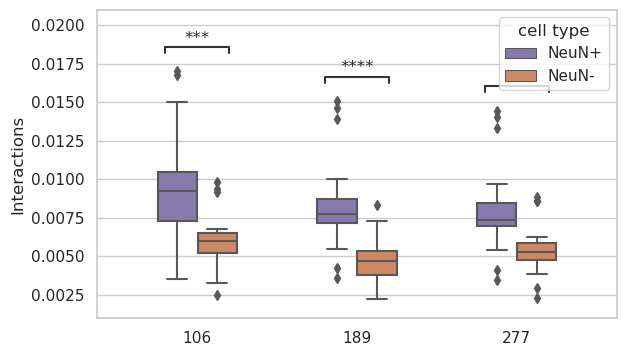

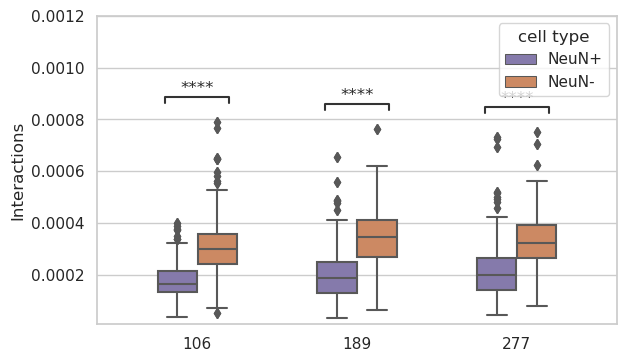

In [197]:
cis_tran_box_plots_plot_hu(res_box_plot_cis_hu, min = 0.001, max = 0.021, add_significance = True, savepath =  f"/tank/projects/diana_hic/figs_hic_paper/figs_hic_paper_review/cis_contacts_individual_maps_Hu.pdf")
cis_tran_box_plots_plot_hu(res_box_plot_trans_hu,  min = 0.00001, max =0.00120, add_significance = True, savepath = f"/tank/projects/diana_hic/figs_hic_paper/figs_hic_paper_review/trans_contacts_individual_maps_Hu.pdf")